In [1]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Global Variables
META_DATA_PATH="../Data/instagram_data.csv"
THRESHOLD = 3
TEST_RATIO = 0.2
RANDOM_STATE = 0
COLUMNS = ["likes", "no_of_comments", "t", "follower_count_at_t"]
X_COLUMNS_REGRESS = ["no_of_comments", "t", "follower_count_at_t"]


In [3]:
def create_data_describe(df, columns):
    summary = {
        'mean':df[columns].mean(),
        'median':df[columns].median(),
        'standard dev.': df[columns].std(),
        'range':df[columns].max() - meta_df[columns].min(),
        'first_quartile':df[columns].quantile(0.25),
        'third_quartile':df[columns].quantile(0.75),
        'interquartile':df[columns].quantile(0.75) - meta_df[columns].quantile(0.25)
    }
    summary_df=pd.DataFrame(summary).round(2)
    return summary_df

# use interquatile to remove outliers
def remove_outliers(df): 
    data_no_outliers = df.copy()
    factor = 5
    for c in df.select_dtypes(include=['number']).columns:
        Q1 = data_no_outliers[c].quantile(0.25)
        Q3 = data_no_outliers[c].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        data_no_outliers = data_no_outliers[(data_no_outliers[c] >= lower_bound) & (data_no_outliers[c] <= upper_bound)]
    return data_no_outliers

In [4]:
meta_df=pd.read_csv(META_DATA_PATH)
meta_df_summary = create_data_describe(meta_df, COLUMNS)
meta_df_summary

,mean,median,standard dev.,range,first_quartile,third_quartile,interquartile
likes,1.832536e+05,1.236640e+05,193696.94,2159938,5.208700e+04,2.431440e+05,191057.0
no_of_comments,2.531380e+03,4.840000e+02,21064.08,733973,1.940000e+02,1.337000e+03,1143.0
t,1.585137e+09,1.588855e+09,13226034.43,104994294,1.582540e+09,1.592738e+09,10197471.0
follower_count_at_t,1.409485e+07,1.104970e+07,9402604.72,40934287,7.296298e+06,1.836292e+07,11066619.0


In [5]:
meta_df_no_outliers = remove_outliers(meta_df)
meta_df_no_outliers_summary = create_data_describe(meta_df_no_outliers, COLUMNS)
meta_df_no_outliers_summary

,mean,median,standard dev.,range,first_quartile,third_quartile,interquartile
likes,1.653796e+05,1.187890e+05,155105.09,1121356,5.029450e+04,2.246330e+05,172546.0
no_of_comments,9.360300e+02,4.350000e+02,1223.34,6961,1.855000e+02,1.162500e+03,968.5
t,1.586430e+09,1.589017e+09,8730356.96,104994294,1.582944e+09,1.592798e+09,10257962.5
follower_count_at_t,1.399248e+07,1.087501e+07,9465913.96,40934287,7.272318e+06,1.760765e+07,10311353.0


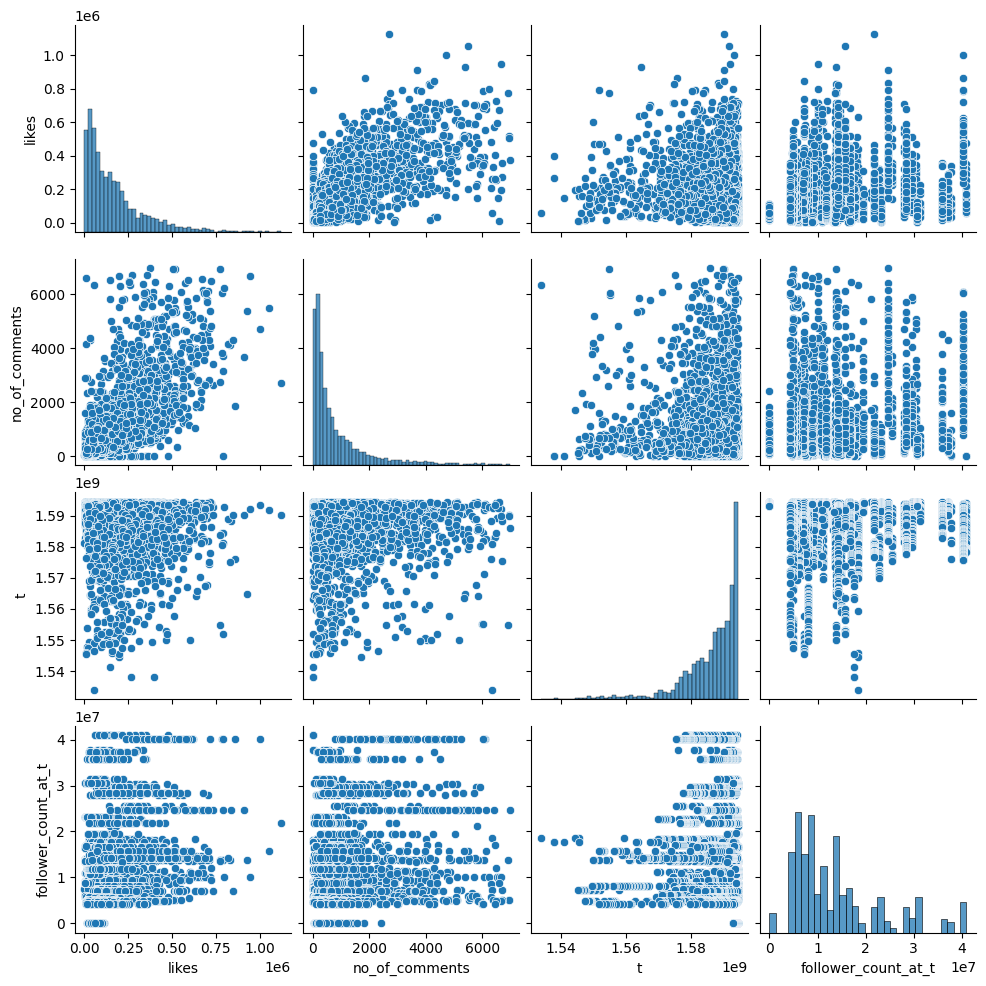

In [6]:
sns.pairplot(meta_df_no_outliers)

In [7]:
def reshape_to_2D(d):
    return d.to_numpy().reshape(-1, 1)

def simple_linear_regression(x_train, y_train, x_test, y_test, x_column, y_column):
    model = LinearRegression()
    model.fit(reshape_to_2D(x_train[x_column]), reshape_to_2D(y_train))
    y_pred = model.predict(reshape_to_2D(x_test[x_column]))
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    plt.scatter(reshape_to_2D(x_test[x_column]), y_test, color = "black", label = "Actual")
    plt.plot(reshape_to_2D(x_test[x_column]), y_pred, color='blue', linewidth=3, label='Predicted')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f'Regression Model-[{x_column}]')
    plt.legend()
    plt.show(), mse, r2
    return model, mse, r2


In [8]:
x_train, x_test, y_train, y_test = train_test_split(meta_df_no_outliers[X_COLUMNS_REGRESS], 
                                                    meta_df_no_outliers["likes"], 
                                                    test_size = TEST_RATIO, 
                                                    random_state = RANDOM_STATE)


<h2>Simple Linear Regression</h2>

In [9]:
linear_mse = []
linear_r2 = []

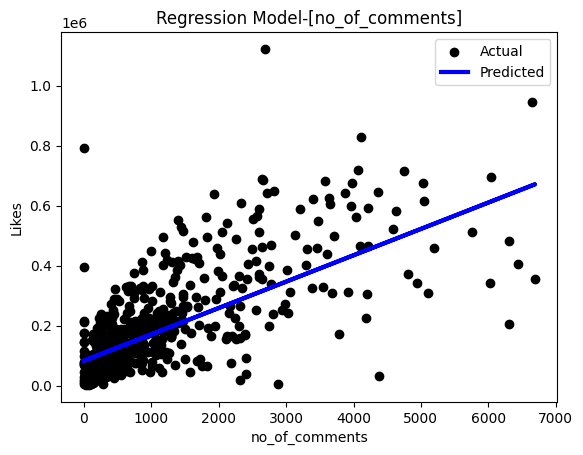

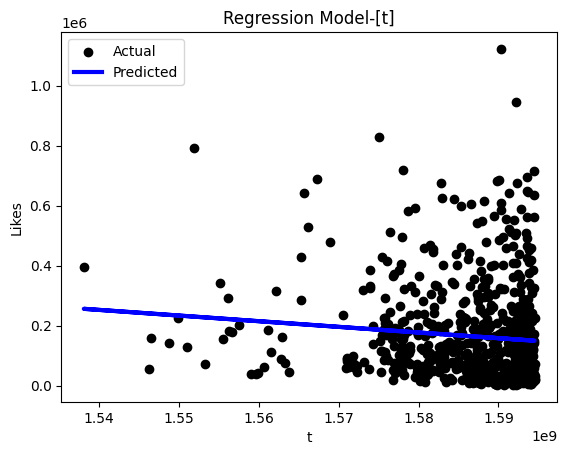

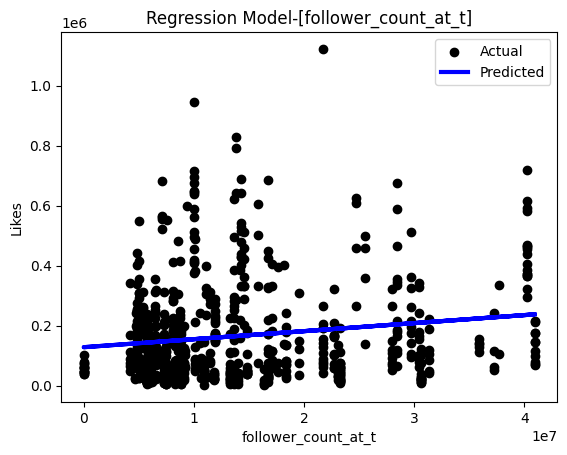

In [10]:
no_c_simple_model, mse_1, r2_1 = simple_linear_regression(x_train, y_train, x_test, y_test, "no_of_comments", "Likes")
linear_mse.append(mse_1)
linear_r2.append(r2_1)

t_simple_model, mse_2, r2_2 = simple_linear_regression(x_train, y_train, x_test, y_test, "t", "Likes")
linear_mse.append(mse_2)
linear_r2.append(r2_2)

t_simple_model, mse_3, r2_3 = simple_linear_regression(x_train, y_train, x_test, y_test, "follower_count_at_t", "Likes")
linear_mse.append(mse_3)
linear_r2.append(r2_3)

In [12]:
def multi_linear_regression(x_train, y_train, x_test, y_test, x_column):
    model = LinearRegression()
    model.fit(x_train[x_column], y_train)
    y_pred = model.predict(x_test[x_column])
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

composition_1 = ["no_of_comments", "t", "follower_count_at_t"]
composition_2 = ["no_of_comments", "follower_count_at_t"]
composition_3 = ["no_of_comments", "t"]
composition_4 = ["t", "follower_count_at_t"]

mse_4, r2_4 = multi_linear_regression(x_train, y_train, x_test, y_test, composition_1)
linear_mse.append(mse_4)
linear_r2.append(r2_4)

mse_5, r2_5 = multi_linear_regression(x_train, y_train, x_test, y_test, composition_2)
linear_mse.append(mse_5)
linear_r2.append(r2_5)

mse_6, r2_6 = multi_linear_regression(x_train, y_train, x_test, y_test, composition_3)
linear_mse.append(mse_6)
linear_r2.append(r2_6)

mse_7, r2_7 = multi_linear_regression(x_train, y_train, x_test, y_test, composition_4)
linear_mse.append(mse_7)
linear_r2.append(r2_7)

In [13]:
x_column = [
    "no_of_comments",
    "t",
    "follower_count_at_t",
    "all x",
    "comments + followers",
    "comments + t",
    "t + followers"
]

simple_linear_regression_summary = pd.DataFrame(list(zip(x_column, linear_mse, linear_r2)), columns =['columns', 'mse', 'r2']) 
simple_linear_regression_summary


,columns,mse,r2
0,no_of_comments,1.257886e+10,0.532596
1,t,2.662794e+10,0.010561
2,follower_count_at_t,2.640313e+10,0.018915
3,all x,1.227645e+10,0.543833
4,comments + followers,1.244498e+10,0.537570
5,comments + t,1.242799e+10,0.538202
6,t + followers,2.607538e+10,0.031093
